<a href="https://colab.research.google.com/github/dcatrib/tesePython/blob/main/Testes_Previsao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install PyMuPDF requests selenium chromedriver-autoinstaller pandas nltk gensim numpy skforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.7 MB/s eta 0:00:00


In [2]:
import requests
import os
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from google.colab import files
import numpy as np
from gensim.models import KeyedVectors, Word2Vec
import gensim
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg

In [3]:
# Faça o upload do arquivo
uploaded = files.upload()

# Carregando o arquivo Excel corretamente
df_final = pd.read_excel('corpus.xlsx')  # Corrigido para corpus.xlsx


# Extraindo a quarta coluna como corpus (fazendo limpeza de valores não-texto)
corpus = df_final.iloc[:, 12].dropna().tolist()  # Remove valores NaN

corpus = [text for text in corpus if isinstance(text, str) and text.strip() != ""]

# Pré-processamento do texto (divisão em palavras)
# Aqui estamos usando um simples split, mas você pode querer fazer mais pré-processamento
corpus_tokenized = [text.split() for text in corpus]

# Word2Vec (cbow)
print("Treinando Word2Vec...")
word2vec_model = gensim.models.Word2Vec(corpus_tokenized, vector_size=100, window=5, min_count=1, workers=4)
print(df_final.head(20))

Saving corpus.xlsx to corpus.xlsx
Treinando Word2Vec...
   trimestre                                               Link  \
0     2003Q2  https://www.bcb.gov.br/en/publications/copommi...   
1     2003Q3  https://www.bcb.gov.br/en/publications/copommi...   
2     2003Q4  https://www.bcb.gov.br/en/publications/copommi...   
3     2004Q1  https://www.bcb.gov.br/en/publications/copommi...   
4     2004Q2  https://www.bcb.gov.br/en/publications/copommi...   
5     2004Q3  https://www.bcb.gov.br/en/publications/copommi...   
6     2004Q4  https://www.bcb.gov.br/en/publications/copommi...   
7     2005Q1  https://www.bcb.gov.br/en/publications/copommi...   
8     2005Q2  https://www.bcb.gov.br/en/publications/copommi...   
9     2005Q3  https://www.bcb.gov.br/en/publications/copommi...   
10    2005Q4  https://www.bcb.gov.br/en/publications/copommi...   
11    2006Q1  https://www.bcb.gov.br/en/publications/copommi...   
12    2006Q2  https://www.bcb.gov.br/en/publications/copommi...   
13    

['recent evolution inflation measures inflation continued downward trend wholesale prices fell mainly due effects recent exchange rate appreciation especially prices tradable goods consumer prices average decelerating although slower rate wholesale level reflecting pressures specific items ipca increased comparison previous accumulating months igpdi decreased compared increase ipadi fell comparison previous igp di ipadi fell consecutive totaling respectively comparison regarding evolution ipca average increase electricity due increases household electricity tariffs public lighting taxes capitals largest single contribution increase ipca increase price rice contributed significantly ipca inflation inflation market regulated prices ipca slowed increase market prices fell due deceleration inflation nontradable goods prices remained stable mainly due declines prices perishable foods increase service prices slowdown inflation tradable goods prices intense prices rising compared continuing u

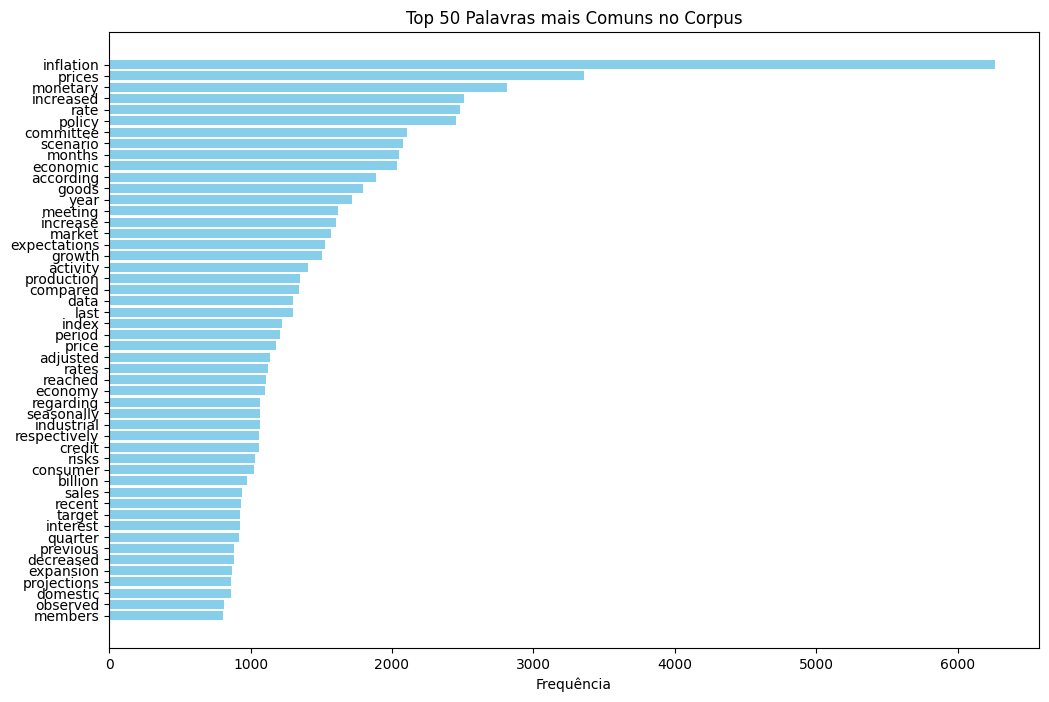


Estatísticas adicionais:
Total de palavras: 276002
Total de palavras únicas: 5693
Comprimento médio das palavras: 7.52 caracteres


In [4]:
from collections import Counter
import matplotlib.pyplot as plt
print(corpus[:3])  # Exibe as 3 primeiras amostras processadas

# Flatten the list of tokenized words (corpus_tokenized)
flat_corpus = [word for sublist in corpus_tokenized for word in sublist]

# Contar a frequência de palavras
word_freq = Counter(flat_corpus)

# Obter as 20 palavras mais comuns e suas frequências
top_50_words = word_freq.most_common(50)

# Exibindo as 20 palavras mais comuns
print("As 50 palavras mais comuns:")
for word, freq in top_50_words:
    print(f"{word}: {freq}")

# Visualizar as 20 palavras mais comuns com um gráfico
words, freqs = zip(*top_50_words)
plt.figure(figsize=(12, 8))
plt.barh(words, freqs, color='skyblue')
plt.xlabel('Frequência')
plt.title('Top 50 Palavras mais Comuns no Corpus')
plt.gca().invert_yaxis()  # Para as palavras mais frequentes ficarem no topo
plt.show()

# Outras estatísticas
total_palavras = len(flat_corpus)
total_palavras_unicas = len(word_freq)
comprimento_medio_palavra = np.mean([len(word) for word in flat_corpus])

print(f"\nEstatísticas adicionais:")
print(f"Total de palavras: {total_palavras}")
print(f"Total de palavras únicas: {total_palavras_unicas}")
print(f"Comprimento médio das palavras: {comprimento_medio_palavra:.2f} caracteres")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['recent', 'evolution', 'inflation', 'measures', 'inflation', 'continued', 'downward', 'trend', 'wholesale', 'prices', 'fell', 'mainly', 'due', 'effects', 'recent', 'exchange', 'rate', 'appreciation', 'especially', 'prices', 'tradable', 'goods', 'consumer', 'prices', 'average', 'decelerating', 'although', 'slower', 'rate', 'wholesale', 'level', 'reflecting', 'pressures', 'specific', 'items', 'ipca', 'increased', 'comparison', 'previous', 'accumulating', 'months', 'igpdi', 'decreased', 'compared', 'increase', 'ipadi', 'fell', 'comparison', 'previous', 'igp']


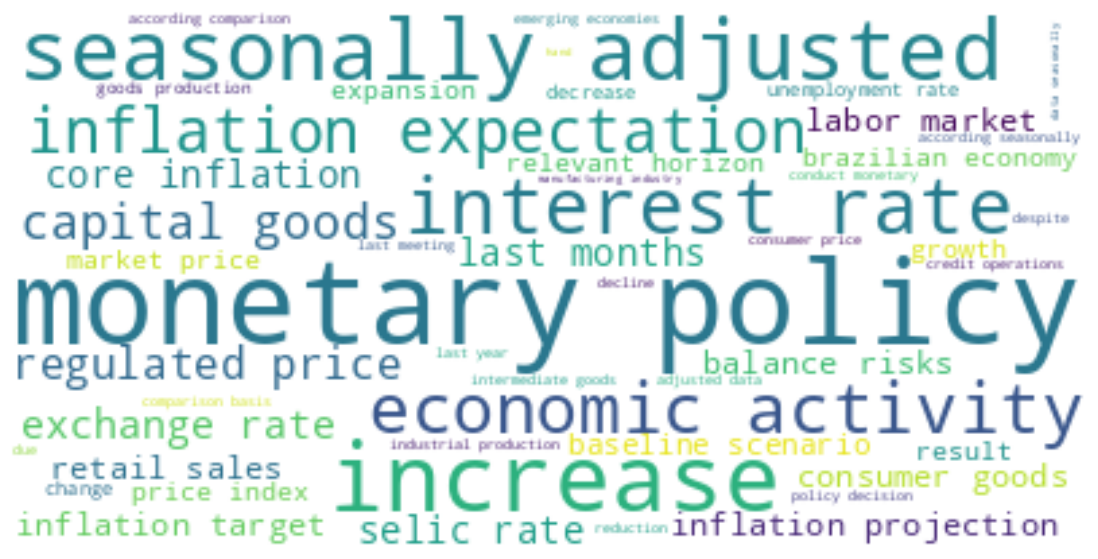

In [5]:
# Generate Word Cloud image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download the 'punkt' resource for tokenization
nltk.download('punkt_tab')

text = " ".join(corpus)

# Tokenize the text into individual words using NLTK
tokens = word_tokenize(text)
print(tokens[:50])  # Print the first 50 tokens

# Join the tokens back into a string
text_for_wordcloud = " ".join(tokens)

# Generate the word cloud with the tokenized text
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(text_for_wordcloud) #com frases
#wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", collocations=False).generate(text_for_wordcloud)

plt.figure(figsize=(15,7))
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

In [7]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the 'vader_lexicon' resource
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

# Convert the 'Texto Processado2' column to strings, handling NaN values
df_final['Texto Processado2'] = df_final['Texto Processado2'].astype(str)

df_final['polarity'] = df_final['Texto Processado2'].apply(lambda x: analyzer.polarity_scores(x))


# Change data structure
df_final = pd.concat(
    [df_final.drop(['polarity'], axis=1),
     df_final['polarity'].apply(pd.Series)], axis=1)
df_final.head(4)
# Create new variable with sentiment "neutral," "positive" and "negative"
df_final['sentiment'] = df_final['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df_final.head(4)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,trimestre,Link,Texto,Link de Download,Texto do PDF,Texto Processado,Ano_Mes,A,B,C,D,Footnotes,Texto Processado2,PIB_Taxa_Trimestral,PIB_Trimestre_Contra_Trimestre,neg,neu,pos,compound,sentiment
0,2003Q2,https://www.bcb.gov.br/en/publications/copommi...,85th Copom minutes - June 2003 84th Copom minu...,https://www.bcb.gov.br/content/copom/copomminu...,Minutes of the 85th Meeting of the Monetary Po...,recent evolution inflation measures inflation ...,2003-06 2003-05,nan nan,nan nan,nan nan,nan nan,nan nan,recent evolution inflation measures inflation ...,0.781242,-0.834888,0.063,0.758,0.178,0.9999,positive
1,2003Q3,https://www.bcb.gov.br/en/publications/copommi...,88th Copom minutes - September 2003 87th Copom...,https://www.bcb.gov.br/content/copom/copomminu...,1 Minutes of the 88th Meeting of the Monetary ...,recent evolution inflation ipca increased incr...,2003-09 2003-08 2003-07,nan nan nan,nan nan nan,nan nan nan,nan nan nan,nan nan nan,recent evolution inflation ipca increased incr...,0.626181,0.841633,0.053,0.774,0.173,0.9999,positive
2,2003Q4,https://www.bcb.gov.br/en/publications/copommi...,91st Copom minutes - December 2003 90th Copom ...,https://www.bcb.gov.br/content/copom/copomminu...,Minutes of the 91st Meeting of the Monetary Po...,recent evolution inflation main inflation indi...,2003-12 2003-11 2003-10,nan nan nan,nan nan nan,nan nan nan,nan nan nan,nan nan nan,recent evolution inflation main inflation indi...,0.588712,1.034545,0.051,0.747,0.201,1.0000,positive
3,2004Q1,https://www.bcb.gov.br/en/publications/copommi...,94th Copom minutes - March 2004 93rd Copom min...,https://www.bcb.gov.br/content/copom/copomminu...,Minutes of the 94th Meeting of the Monetary Po...,recent evolution inflation price deceleration ...,2004-03 2004-02 2004-01,nan nan nan,nan nan nan,nan nan nan,nan nan nan,nan nan nan,recent evolution inflation price deceleration ...,3.878082,1.487211,0.063,0.782,0.155,0.9999,positive


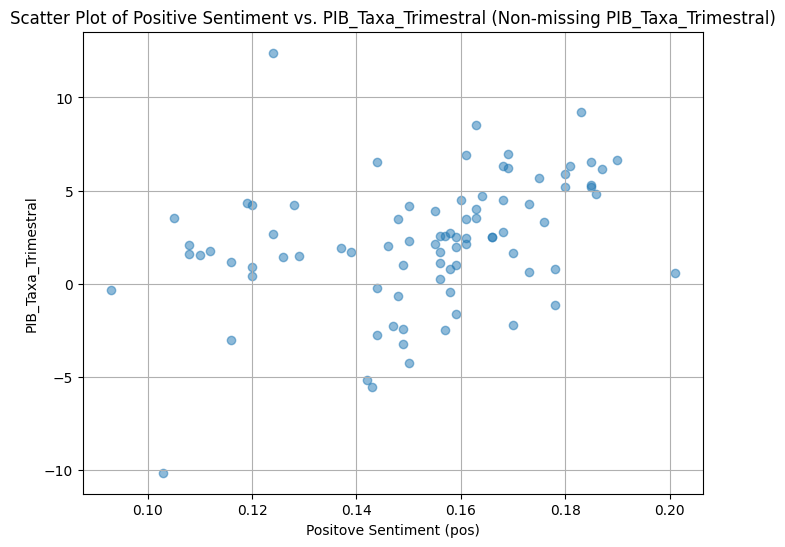

In [9]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'Valor' is not missing
filtered_df = df_final

# Extract the 'neg' and 'Valor' columns from the filtered DataFrame
pos_values = filtered_df['pos']
valor_values = filtered_df['PIB_Taxa_Trimestral']

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(pos_values, valor_values, alpha=0.5)  # alpha controls point transparency
plt.xlabel("Positove Sentiment (pos)")
plt.ylabel("PIB_Taxa_Trimestral")
plt.title("Scatter Plot of Positive Sentiment vs. PIB_Taxa_Trimestral (Non-missing PIB_Taxa_Trimestral)")
plt.grid(True)  # Add a grid for better visualization
plt.show()

In [10]:
# Função para obter o vetor médio
def get_average_vector(text):
    if isinstance(text, str):  # Verifica se o texto é uma string
        words = text.split()
        word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)
    return np.zeros(word2vec_model.vector_size)  # Retorna vetor zero se não houver palavras válidas ou se o texto não for string

# Criar a nova coluna 'Texto Processado'
df_final['Vetor Médio'] = df_final['Texto Processado2'].apply(get_average_vector)

   trimestre                                               Link  \
0     2003Q2  https://www.bcb.gov.br/en/publications/copommi...   
1     2003Q3  https://www.bcb.gov.br/en/publications/copommi...   
2     2003Q4  https://www.bcb.gov.br/en/publications/copommi...   
3     2004Q1  https://www.bcb.gov.br/en/publications/copommi...   
4     2004Q2  https://www.bcb.gov.br/en/publications/copommi...   
..       ...                                                ...   
82    2023Q4  https://www.bcb.gov.br/en/publications/copommi...   
83    2024Q1  https://www.bcb.gov.br/en/publications/copommi...   
84    2024Q2  https://www.bcb.gov.br/en/publications/copommi...   
85    2024Q3  https://www.bcb.gov.br/en/publications/copommi...   
86    2024Q4  https://www.bcb.gov.br/en/publications/copommi...   

                                                Texto  \
0   85th Copom minutes - June 2003 84th Copom minu...   
1   88th Copom minutes - September 2003 87th Copom...   
2   91st Copom minutes -

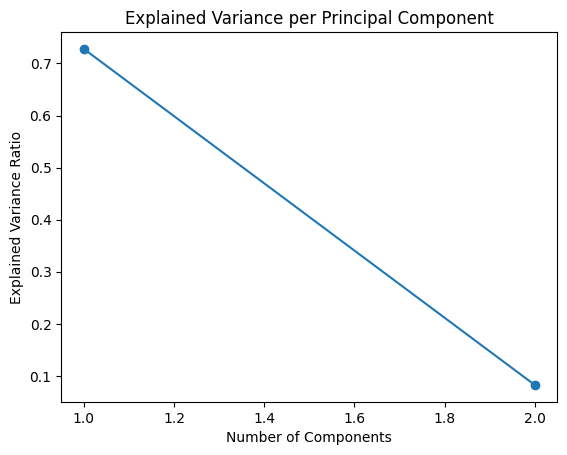

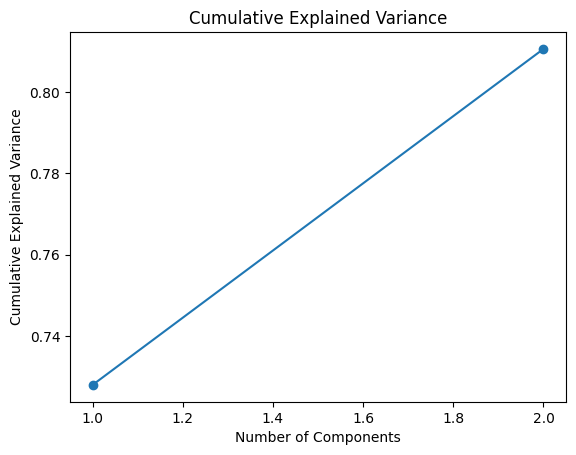

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separar as features e o target
X = df_final['Vetor Médio'].to_list()
X = np.array(X)

# Escalonar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)  # Ajustar o número de componentes conforme necessário
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=X_pca,
                             columns=['PC' + str(i) for i in range(1, pca.n_components_ + 1)],
                             index=df_final.index)  # Use original index

# Concatenate the principal components with the original DataFrame
df_final_pca = pd.concat([df_final, principal_df], axis=1)
df_final_pca['PCA'] = X_pca.tolist()

print(df_final_pca)

# Get explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratio
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print cumulative explained variance
print("\nCumulative Explained Variance:")
for i, variance in enumerate(cumulative_variance):
    print(f"PC{i+1}: {variance:.4f}")

# Plot explained variance
import matplotlib.pyplot as plt
plt.plot(range(1, pca.n_components_ + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per Principal Component')
plt.show()

# Plot cumulative explained variance
plt.plot(range(1, pca.n_components_ + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

AR2 MSE: 1.0309452778340154
LinearRegression MSE: 11.360648507327666
   trimestre  Valor_Atual  AR2_Previsto  LinearRegression_Previsto
42   2013-4T          3.0      2.898389                   3.360445
43   2014-1T          3.2      2.832164                   1.998775
44   2014-2T          2.1      3.164604                   6.471699
45   2014-3T          1.2      1.160226                   5.875549
46   2014-4T          0.5      0.477779                   2.764650
47   2015-1T         -0.7     -0.021134                   4.676056
48   2015-2T         -1.3     -1.523788                  -1.117741
49   2015-3T         -2.2     -1.647598                  -2.933010
50   2015-4T         -3.5     -2.718233                  -1.806850
51   2016-1T         -4.4     -4.255609                  -3.744663
52   2016-2T         -4.5     -4.811184                  -3.636955
53   2016-3T         -4.1     -4.294961                 -12.078821
54   2016-4T         -3.3     -3.510211                  -3.

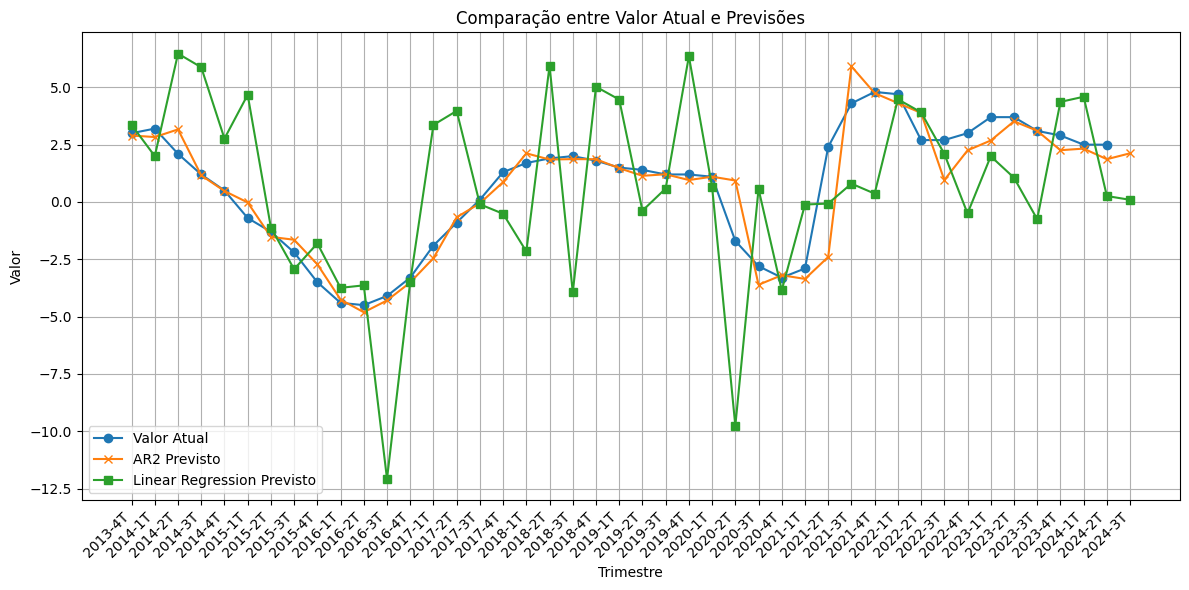

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Assuming df_agrupado is your DataFrame with 'trimestre', 'Valor', and 'Vetor Médio' columns

window_size = 42
forecasts = {'AR2': [], 'LinearRegression': []}

for i in range(window_size, len(df_agrupado) - 1):
    train_data = df_agrupado.iloc[i - window_size:i]
    test_data = df_agrupado.iloc[i:i + 1]
    y_train, y_test = train_data['Valor'], test_data['Valor']
    X_train = np.array(train_data['Vetor Médio'].tolist()).reshape(len(train_data), -1)
    X_test = np.array(test_data['Vetor Médio'].tolist()).reshape(len(test_data), -1)

    try:
        forecasts['AR2'].extend(AutoReg(y_train, lags=2, trend='n', seasonal=False).fit().predict(start=len(y_train), end=len(y_train)))
    except ValueError:
        forecasts['AR2'].extend([np.nan])

    forecasts['LinearRegression'].extend(LinearRegression().fit(X_train, y_train).predict(X_test))

for model_name, predicted_values in forecasts.items():
    diff = len(df_agrupado['Valor'][window_size:]) - len(predicted_values)
    actual_values = df_agrupado['Valor'][window_size: len(df_agrupado['Valor']) - diff].to_numpy()
    valid_indices = ~np.isnan(predicted_values) & ~np.isnan(actual_values)  # Filter for both
    predicted_values = np.array(predicted_values)
    mse = mean_squared_error(actual_values[valid_indices], predicted_values[valid_indices])
    print(f'{model_name} MSE: {mse}')

# Calculate the difference in length
diff = len(df_agrupado['Valor'][window_size:]) - len(forecasts['AR2'])  # Or forecasts['LinearRegression']

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'trimestre': df_agrupado['trimestre'][window_size:len(df_agrupado['trimestre']) - diff],  # Adjusted slicing
    'Valor_Atual': df_agrupado['Valor'][window_size:len(df_agrupado['Valor']) - diff],  # Adjusted slicing
    'AR2_Previsto': forecasts['AR2'],
    'LinearRegression_Previsto': forecasts['LinearRegression']
})

print(results_df)

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(results_df['trimestre'], results_df['Valor_Atual'], label='Valor Atual', marker='o')
plt.plot(results_df['trimestre'], results_df['AR2_Previsto'], label='AR2 Previsto', marker='x')
plt.plot(results_df['trimestre'], results_df['LinearRegression_Previsto'], label='Linear Regression Previsto', marker='s')

# Customize the plot
plt.xlabel('Trimestre')
plt.ylabel('Valor')
plt.title('Comparação entre Valor Atual e Previsões')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


LinearRegression MSE: 16.093812981747377
Lasso MSE: 15.125177626347815
Ridge MSE: 10.96945868194113
AR2 MSE: 11.087906830388297
RandomForest MSE: 11.754315401815788
             Actual  LinearRegression     Lasso     Ridge       AR2  \
trimestre                                                             
2007Q1     5.194691          4.310867  4.033386  3.761141  4.601332   
2007Q2     6.537257          4.329679  4.176072  4.023466  5.047051   
2007Q3     5.870252          4.619771  4.337804  4.335454  6.507292   
2007Q4     6.639735          4.887942  4.727746  4.674541  5.863998   
2008Q1     6.157404          5.954802  5.541999  5.021403  6.168188   
...             ...               ...       ...       ...       ...   
2023Q2     3.468068         -1.068011 -0.815839  1.245210  1.884850   
2023Q3     1.959727         -0.279682 -0.204949  1.547562  1.487175   
2023Q4     2.053173          3.271098  3.010509  1.767863  0.955609   
2024Q1     2.456020          8.065403  7.400137  2.051

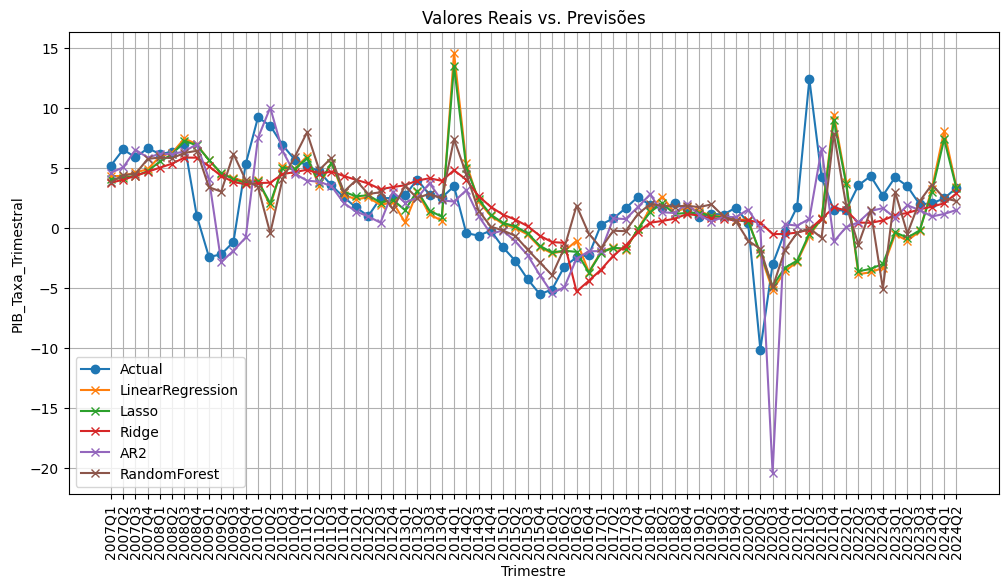

In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Descartar as observações onde a coluna 'Valor' é missing (NaN)
df_final_cleaned = df_final_pca.dropna(subset=['PIB_Taxa_Trimestral'])
df_final_cleaned.loc[:, 'trimestre'] = pd.PeriodIndex(df_final_cleaned['trimestre'], freq='Q')
df_final_cleaned = df_final_cleaned.set_index('trimestre')  # Set 'trimestre' as index
#print(df_final_cleaned.head(10))

variavelX = 'PCA'
variavelY = 'PIB_Taxa_Trimestral'

# Definir o tamanho da janela deslizante
window_size = 15 # Ajustar conforme necessário

# Create an empty dictionary to store the forecast results for each model
forecasts = {}

# Iterate through the models
for model_name in ['LinearRegression', 'Lasso', 'Ridge', 'AR2', 'RandomForest']:
    forecasts[model_name] = []

    # Rolling window loop
    for i in range(window_size, len(df_final_cleaned)):
        # Get the training and testing data for the current window
        train_data = df_final_cleaned.iloc[i - window_size:i]
        test_data = df_final_cleaned.iloc[i:i + 1]  # Forecast for the next timestamp

        # Prepare features and target variable
        X_train = np.array(train_data[variavelX].tolist()).reshape(len(train_data), -1)
        X_test = np.array(test_data[variavelX].tolist()).reshape(len(test_data), -1)
        y_train = train_data[variavelY]
        y_test = test_data[variavelY]

        # Create and train the model based on the model name
        if model_name == 'AR2':
            try:
                model = AutoReg(y_train, lags=2, trend='n', seasonal=False).fit()  # Removed old='nc'
                forecast = model.predict(start=len(y_train), end=len(y_train))  # Predict 1 step ahead
            except ValueError:
                forecast = [np.nan]  # Or any other appropriate handling for errors
        elif model_name == 'Lasso':
            model = Lasso(alpha=0.1).fit(X_train, y_train)
            forecast = model.predict(X_test)
        elif model_name == 'Ridge':
            model = Ridge(alpha=100).fit(X_train, y_train)
            forecast = model.predict(X_test)
        elif model_name == 'RandomForest':
            model = RandomForestRegressor().fit(X_train, y_train)
            forecast = model.predict(X_test)
        elif model_name == 'LinearRegression':
            model = LinearRegression().fit(X_train, y_train)
            forecast = model.predict(X_test)

        forecasts[model_name].extend(forecast)


# Evaluate the models using Mean Squared Error (MSE)
for model_name in forecasts:
    # Calculate the difference in length
    diff = len(df_final_cleaned[variavelY][window_size:]) - len(forecasts[model_name])

    # Adjust the target variable to match forecast length, handling potential NaNs
    actual_values = df_final_cleaned[variavelY][window_size: len(df_final_cleaned[variavelY]) - diff]
    predicted_values_np = np.array(forecasts[model_name])

    # Remove NaNs for MSE calculation
    valid_indices = ~np.isnan(predicted_values_np)
    actual_values = actual_values[valid_indices]
    predicted_values = predicted_values_np[valid_indices]

    mse = mean_squared_error(actual_values, predicted_values)
    print(f'{model_name} MSE: {mse}')

# Create a list to store the data for the DataFrame
data = []
# Iterate over the index of actual values
for i in range(len(actual_values)):
    # Create a row with actual value and predictions from all models
    row = {'Actual': actual_values.iloc[i]}  # Use iloc for index-based access
    for model_name in forecasts:
        try:
            row[model_name] = forecasts[model_name][i]  # Use i for list indexing
        except IndexError:  # Handle potential IndexError if forecasts list is shorter
            row[model_name] = np.nan  # Add NaN if prediction is not available for that timestamp
    data.append(row)


# Create the DataFrame
results_df = pd.DataFrame(data, index=actual_values.index)
# Display the table
print(results_df)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

trimestres = results_df.index.to_series().astype(str).tolist()

# Plot the actual values
ax.plot(trimestres, actual_values.values, label='Actual', marker='o')
#ax.plot(actual_values.index.to_timestamp().astype(int), actual_values.values, label='Actual', marker='o') # If you converted to a DatetimeIndex using to_timestamp

# Plot the predictions for each model
for model_name in forecasts:
    # Adjust the predicted values to match the length of actual values
    predicted_values = forecasts[model_name][:len(actual_values)]

    ax.plot(trimestres, predicted_values, label=model_name, marker='x')

# Set plot labels and title
ax.set_xlabel('Trimestre')
ax.set_ylabel('PIB_Taxa_Trimestral')
ax.set_title('Valores Reais vs. Previsões')
ax.legend()
ax.grid(True)

# Rotacionar os rótulos do eixo X
plt.xticks(rotation=90)

# Display the plot
plt.show()

- ajeitar o pequeno erro
- escolher o melhor alpha automaticamente
- colocar o summary dos modelos

In [ ]:
# Exportando para Excel
output_excel = 'resultados.xlsx'
results_df.to_excel(output_excel, index=False)

# Download no Google Colab
files.download(output_excel)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>